In [27]:
import pandas as np
import numpy as np
import matplotlib as mlt
import seaborn as sns
import sklearn
import scikitplot as skl
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [28]:
df = pd.read_csv('diabetes.csv')
df.head(20)
# https://www.kaggle.com/saurabh00007/diabetescsv

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.shape

(768, 9)

In [31]:
df.info() # No Null Values to handle, no category data to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

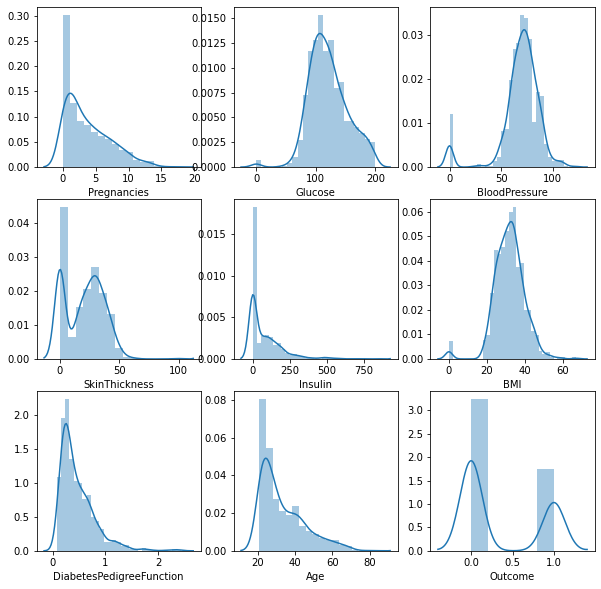

In [32]:
# Looking at the Distribution of Data:
plt.figure(figsize=(10,10))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

We can see alot of ZERO values in many features, which is not good, lets see either drop those rows or change the values:

In [33]:
# Replacing Zero values:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

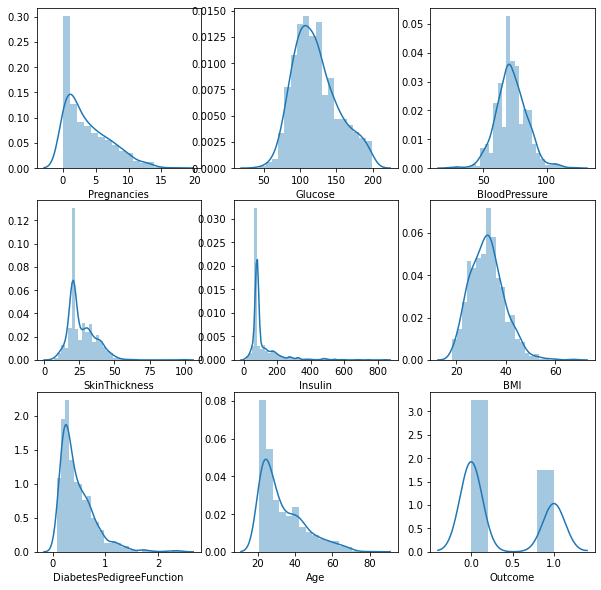

In [34]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Graphs looking pretty normalized now after handling 0 values

<IPython.core.display.Javascript object>

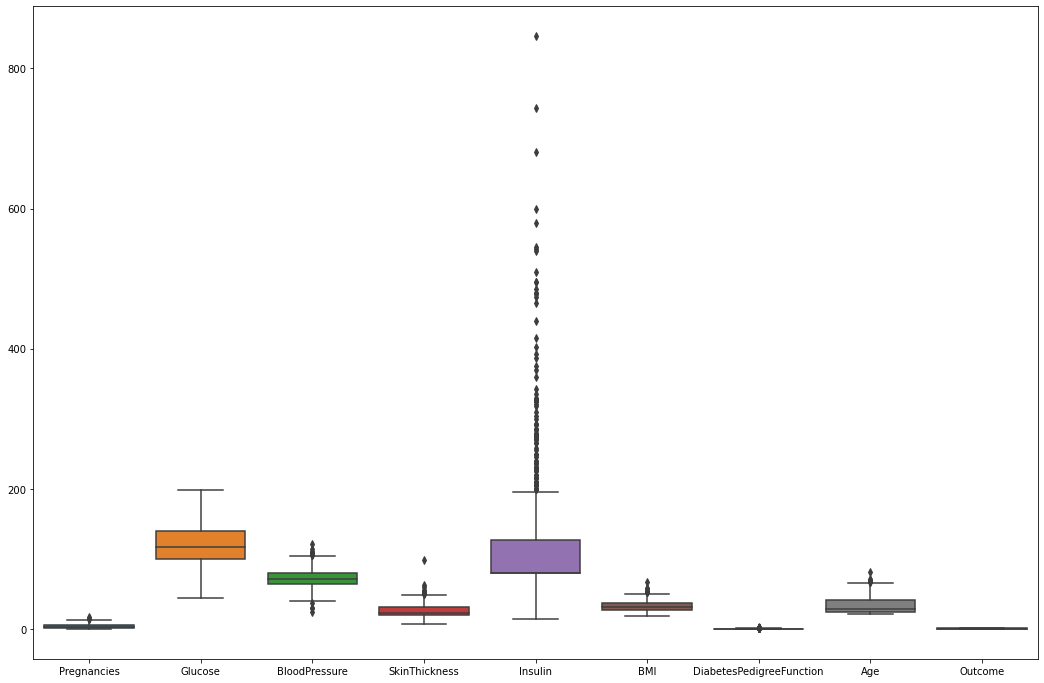

In [35]:
# Checking outliers through Box Plots;
fig, ax=plt.subplots(figsize=(18,12))
sns.boxplot(data=df,width=0.8,ax=ax)

In [36]:
# There are huge outliers in Insulin feature, which we can sort by using quantile:
q = df['Insulin'].quantile(0.95)
cleaned_data = df[df['Insulin']<q]

<IPython.core.display.Javascript object>

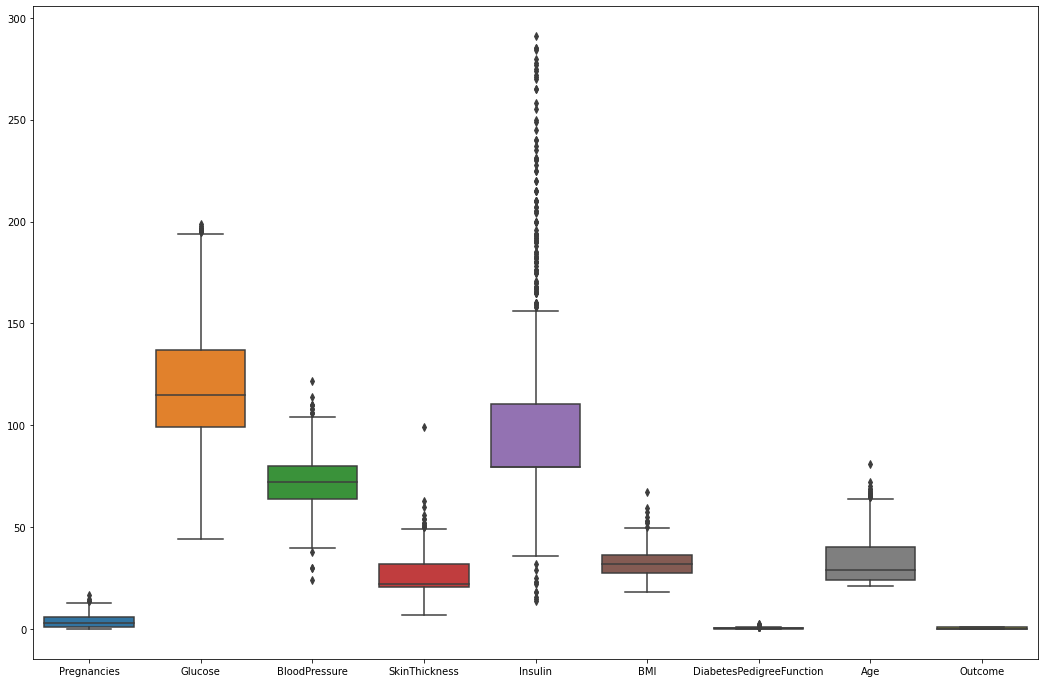

In [37]:
# Checking outliers through Box Plots;
fig, ax=plt.subplots(figsize=(18,12))
sns.boxplot(data=cleaned_data,width=0.8,ax=ax)

But lets not do this because we will have to do this for all the columns as we can see its showing many outliers now. We will check the accuracy and if the accuracy is not good, we will come back to process this:

In [38]:
# Taking X and Y Axis
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

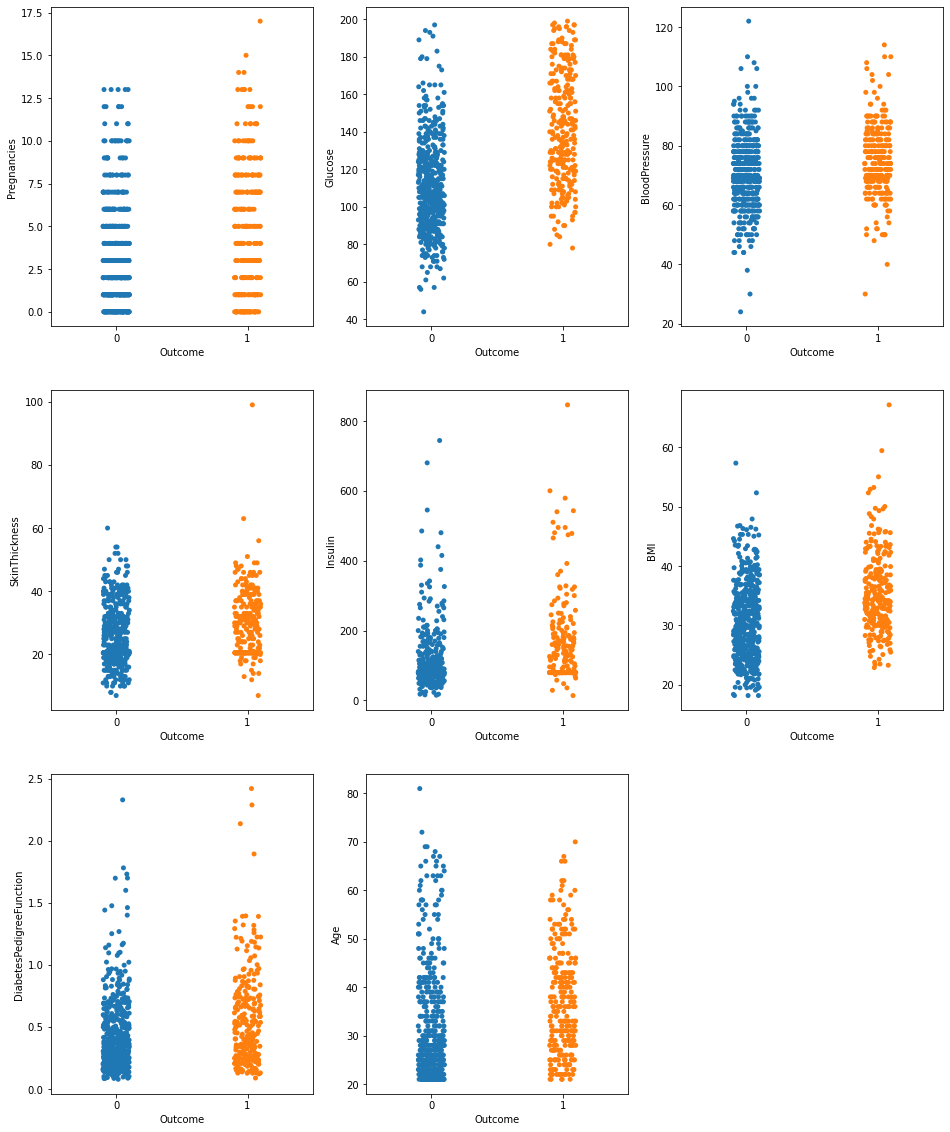

In [39]:
# Visualizing the relationships between Variables:
plt.figure(figsize=(16,20))
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber+=1


The data looks fairly equally dibursed but still fluctuated, lets use Standard Scaling to scale the data

In [40]:
Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [41]:
X_Scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [42]:
# Finding VIF

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif['Features'] = X.columns
vif

<IPython.core.display.Javascript object>

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


VIF calues are very low, which means not much chances of Multicolinearity

In [43]:
# Splitting the data into Test and Train to fit in the model:
x_train, x_test, y_train, y_test = train_test_split(X_Scaled,Y,test_size=0.25, random_state=300)

<IPython.core.display.Javascript object>

In [44]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

<IPython.core.display.Javascript object>

LogisticRegression()

In [45]:
# Saving the Model:
filename = 'Logistic_Regression_Model.pickle'
pickle.dump(logistic_reg,open(filename,'wb'))

### Checking the Performance of the Model now:

In [46]:
y_pred = logistic_reg.predict(x_test)

In [47]:
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
accuracy

0.7916666666666666

In [48]:
# Accuracy is 79.1%, lets draw Confusion Matrix:
conf_mat = sklearn.metrics.confusion_matrix(y_test,y_pred)
conf_mat

array([[119,  10],
       [ 30,  33]], dtype=int64)

In [49]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [50]:
# In this case, focussing on Recall method, check all the metrics:
Accuracy = (TP + TN) / (TP + FP + TN + TN)
print('Accuracyis :',Accuracy)

# Precission:
Precission = TP / (TP+FP)
print('Precission is:', Precission)

# Recall
Recall = TP / (TP+FN)
print('Recall is:', Recall)

# F1 Score:
F1 = 2 * (Recall * Precission) / (Recall + Precission)
print('F1 Score is:', F1)

# Area Under Curve (AUC):
auc = sklearn.metrics.roc_auc_score(y_test,y_pred)
print('AUC is: ', auc)

Accuracyis : 0.7794871794871795
Precission is: 0.9224806201550387
Recall is: 0.7986577181208053
F1 Score is: 0.8561151079136691
AUC is:  0.7231450719822813


In [51]:
# Checking ROC curve:
fpr, tpr, threshold, = sklearn.metrics.roc_curve(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

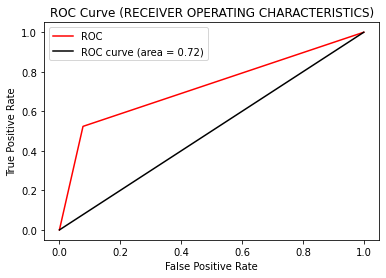

In [58]:
plt.plot(fpr,tpr,color='red', label='ROC')
plt.plot([0,1], [0,1],color='black', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RECEIVER OPERATING CHARACTERISTICS)')
plt.legend()
plt.show()

# <font color = 'red'> Conclusion: </font>
## The model has high Accuracy and Recall (more than 77%) and F1 score is also very good.
## We can test other models with other models such as SVM or Clustering Model and can select the best one based on the highest ## AUC value. 